# Descrição

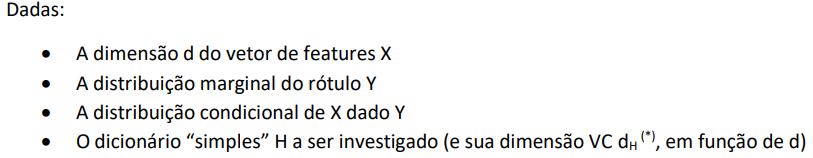

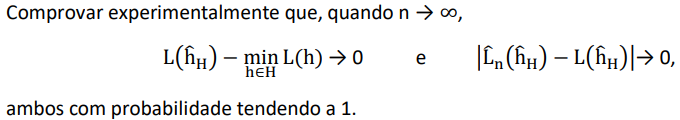


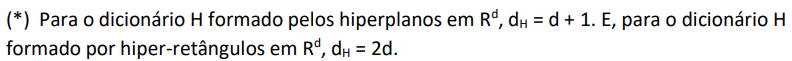

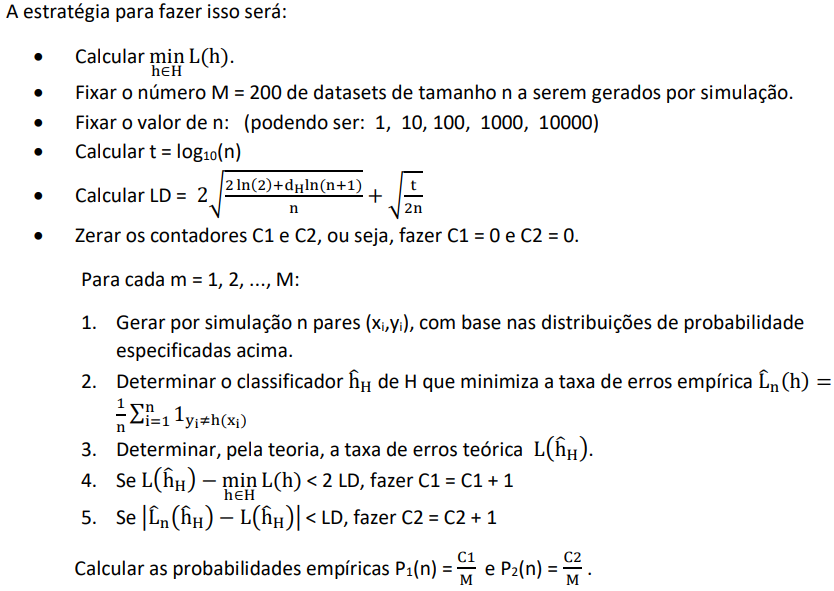

* L(h) se refere a probabilidade de erro do classificador h
- L(h) é mínima para o classificador de Bayes.

# Funções

In [14]:
require(graphics)

In [18]:
getMultiples <- function(value, n) {
    container <- (value)
    for (i in (2:n)) {
        container <- append(container, value*i)
    }
    return (container)
}

getPowers <- function(value, n) {
    container <- (value)
    for (i in (2:n)) {
        container <- append(container, value**i)
    }
    return (container)
}

generateDistribution <- function(myDist, N, mean, sd) {
    groupA <- myDist(N, mean, sd)
    groupB <- myDist(N, -mean, sd)
    retContainer <- list(groupA, groupB)
    return (retContainer)
}

calculateLD <- function(n, dh) {
    t <- log10(n)
    aux1 <- 2*sqrt( ( 2*log(2) + dh*log(n+1) ) / n)
    aux2 <- sqrt(t/(2*n))
    return (aux1 + aux2)
}

generateDataFrame <- function(n) {
    target <- c(integer(n)+1, integer(n)-1 )
    x1 <- c( rnorm(n, 1, 1), rnorm(n, -1, 1) )
    df <- data.frame(x1, target)
    
    return (target)
}

generateRandomData <- function(n) {
    target <- c()
    x <- c()
    for (i in (1:n)) {
        target <- c(target, sample( c(-1,1), 1) )
        x <- c(x, rnorm(1, tail(target, 1), 1) )
    }
    df <- data.frame(x, target)
    return (df)
}

applyModel <- function(dataFrame) {
    library(MASS)
    fit <- lda(target~., data=dataFrame)
    predictions <- predict(fit, dataFrame[,1:2])$class
    table <- table(predictions, dataFrame$target)
    P1 <- (table[1] + table[2]) / nrow(dataFrame)
    P2 <- (table[3] + table[4]) / nrow(dataFrame)
    accuracy <- (table[1] + table[4]) / (nrow(dataFrame))
#     print(fit['prior'])
#     print( c(accuracy, 1-accuracy, fiprior[1], fit$prior[2], fit) )
    return (c(accuracy, 1-accuracy, P1, P2, fit))
}

simulate <- function(M, dh) {
    nValues <- getPowers(10,3)
    for (n in nValues) {
        LD <- calculateLD(n, dh)
        t <- log10(n)
        C1 <- 0
        C2 <- 0
        auxLD <- calculateLD(n, dh)
        bestFit <- NULL
        bestError <- 1
        for (m in c(1:M)) {
            auxDataFrame <- generateRandomData(n)
            results <- applyModel(auxDataFrame) # Accuracy, Error, Probability class1, Probability class2 
            print(results)
            print("END================")
            }
    }
}

[[1]]
 [1]  0.26623627  3.05538589 -0.87509812  2.10217736  2.18193695  1.49676068
 [7] -0.09512887 -0.42496498  1.32691112  0.07442455

[[2]]
 [1] -0.3217843 -0.6375752 -2.1680318 -1.1861172 -1.5155847 -0.5493789
 [7] -0.2220403 -2.1526800 -2.3828479 -0.9475421

# Distribuições

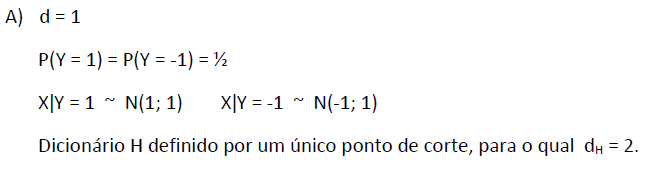

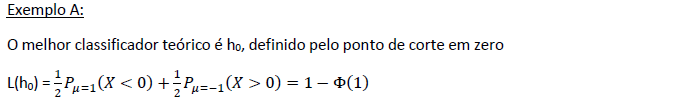

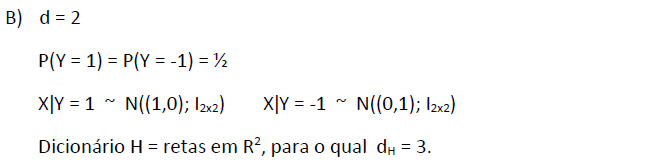

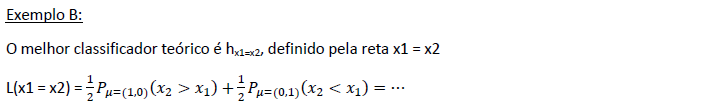

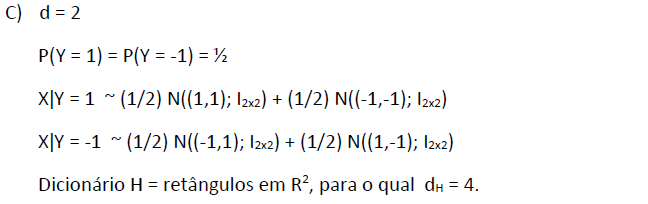

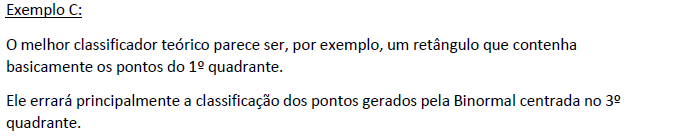

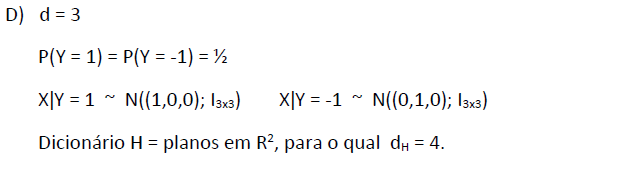

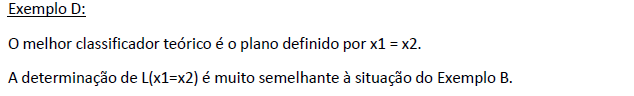

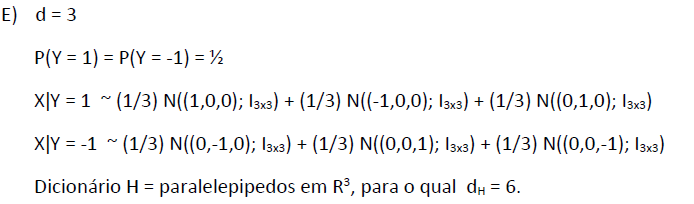

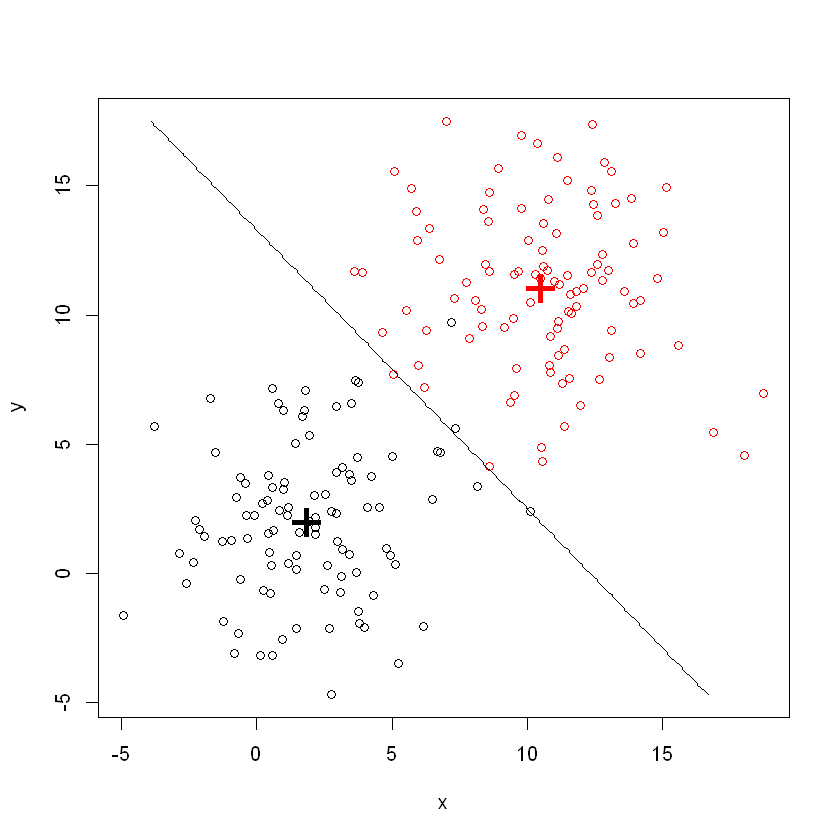

In [13]:
require(MASS)

# generate data
set.seed(357)
Ng <- 100 # number of cases per group
group.a.x <- rnorm(n = Ng, mean = 2, sd = 3)
group.a.y <- rnorm(n = Ng, mean = 2, sd = 3)

group.b.x <- rnorm(n = Ng, mean = 11, sd = 3)
group.b.y <- rnorm(n = Ng, mean = 11, sd = 3)

group.a <- data.frame(x = group.a.x, y = group.a.y, group = "A")
group.b <- data.frame(x = group.b.x, y = group.b.y, group = "B")

my.xy <- rbind(group.a, group.b)

# construct the model
mdl <- lda(group ~ x + y, data = my.xy)

# draw discrimination line
np <- 300
nd.x <- seq(from = min(my.xy$x), to = max(my.xy$x), length.out = np)
nd.y <- seq(from = min(my.xy$y), to = max(my.xy$y), length.out = np)
nd <- expand.grid(x = nd.x, y = nd.y)

prd <- as.numeric(predict(mdl, newdata = nd)$class)

plot(my.xy[, 1:2], col = my.xy$group)
points(mdl$means, pch = "+", cex = 3, col = c("black", "red"))
contour(x = nd.x, y = nd.y, z = matrix(prd, nrow = np, ncol = np), 
        levels = c(1, 2), add = TRUE, drawlabels = FALSE)

In [311]:
df_resumo <- data.frame(n=numeric(0),
                        t=numeric(0),
                        corte=numeric(0),
                        Ln=numeric(0),
                        L=numeric(0),
                        A=numeric(0),
                        LDx2=numeric(0),
                        B=numeric(0),
                        LD=numeric(0),
                        Prob=numeric(0) )

C1 <- 0 # contador 1
C2 <- 0 # contador 2
L_emprical <- 0 # Error empírico
L_theorical <- 0 # Erro teórico

df_resumo

n,t,corte,Ln,L,A,LDx2,B,LD,Prob
